In [1]:
from __future__ import annotations

import warnings

import numpy as np
from utils.dataset_utils import (
    HyperplaneStream,
    LabelShiftDataStream,
    SyntheticDataStream,
)
from utils.experiment import Experiment

from river import datasets, naive_bayes, tree

warnings.filterwarnings("ignore")

## TODO:
* Color plots
* Add drift variable to plots

## Experiments

### Synthetic dataset with gaussian data

#### Model - Naive Bayes

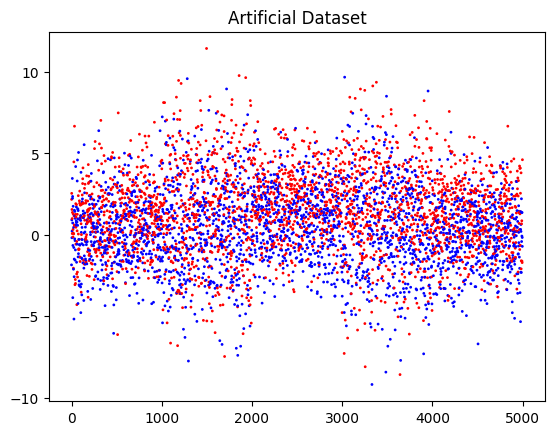

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.05
Processing detector JSWIN with params alpha=0.1
Processing detector JSWIN with params alpha=0.2
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector ADWIN with params delta=0.001
Processing detector ADWIN with params delta=0.002
Processing detector ADWIN with params delta=0.005
Processing detector ADWIN with params delta=0.01
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector KSWIN with params alpha=0.005
Processing detector KSWIN with params alpha=0.01
Processing detector KSWIN with params alpha=0.05
Processing detector PH with params min_instances=100 delta=0.005
Processing detector PH with params min_instances=30 d

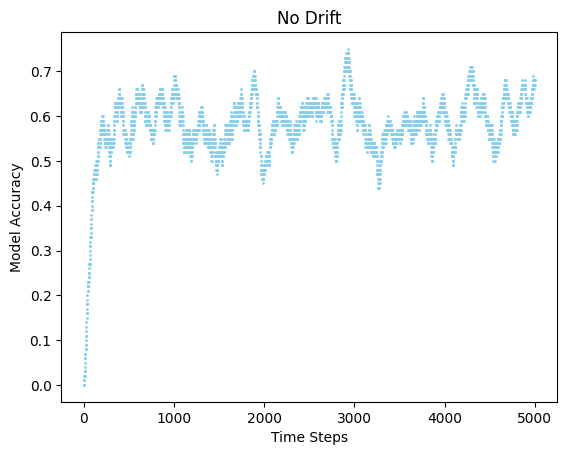

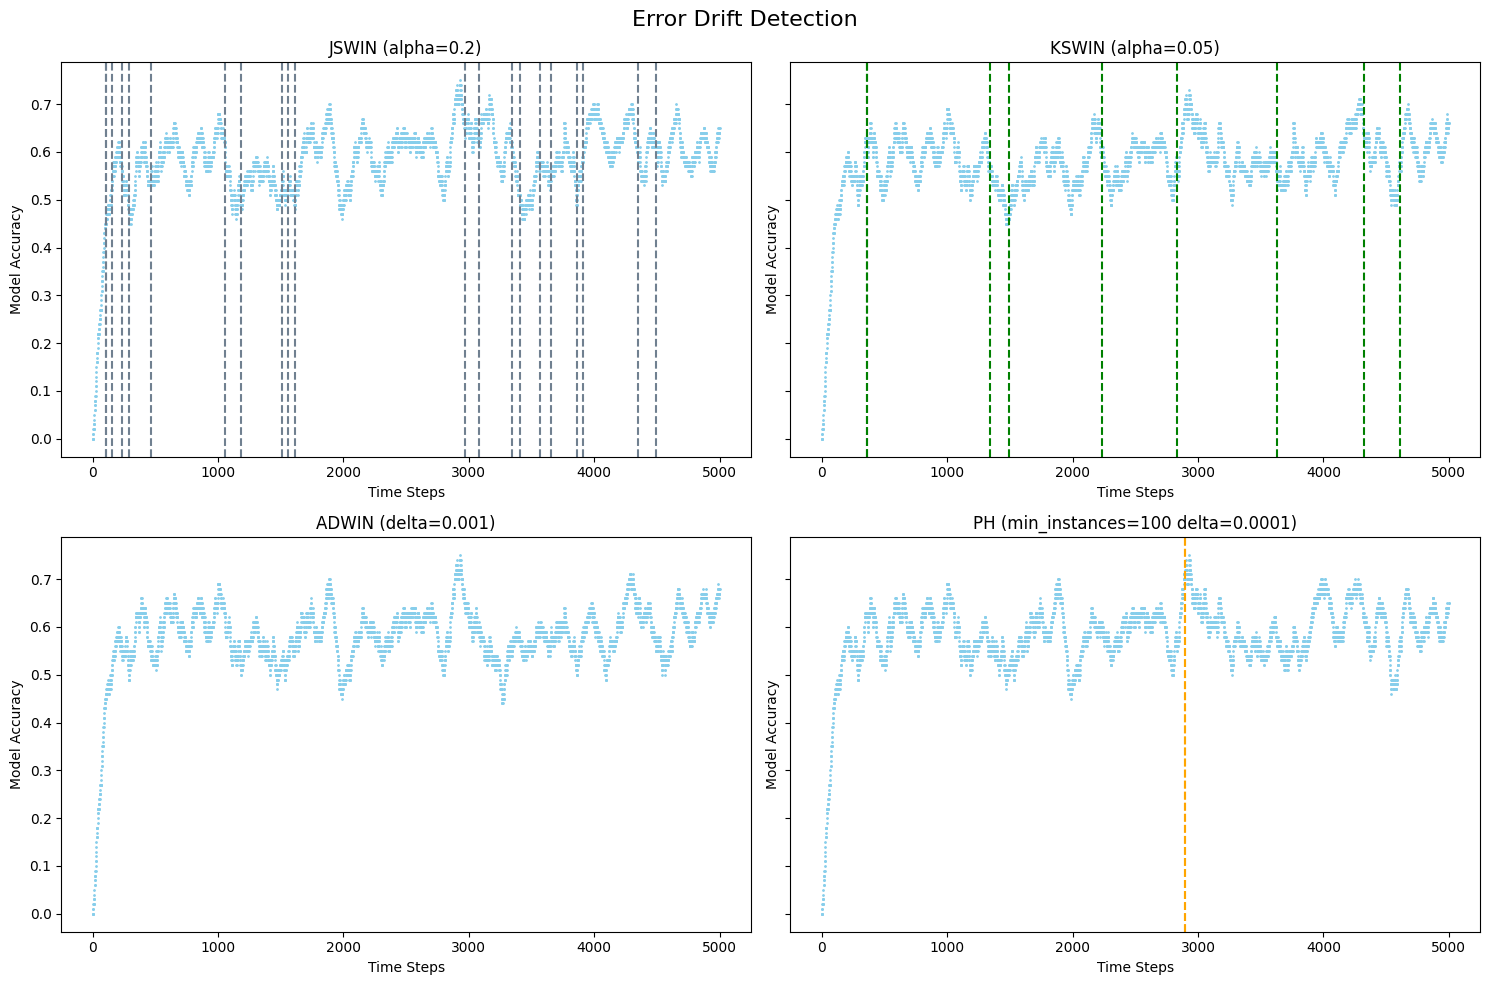

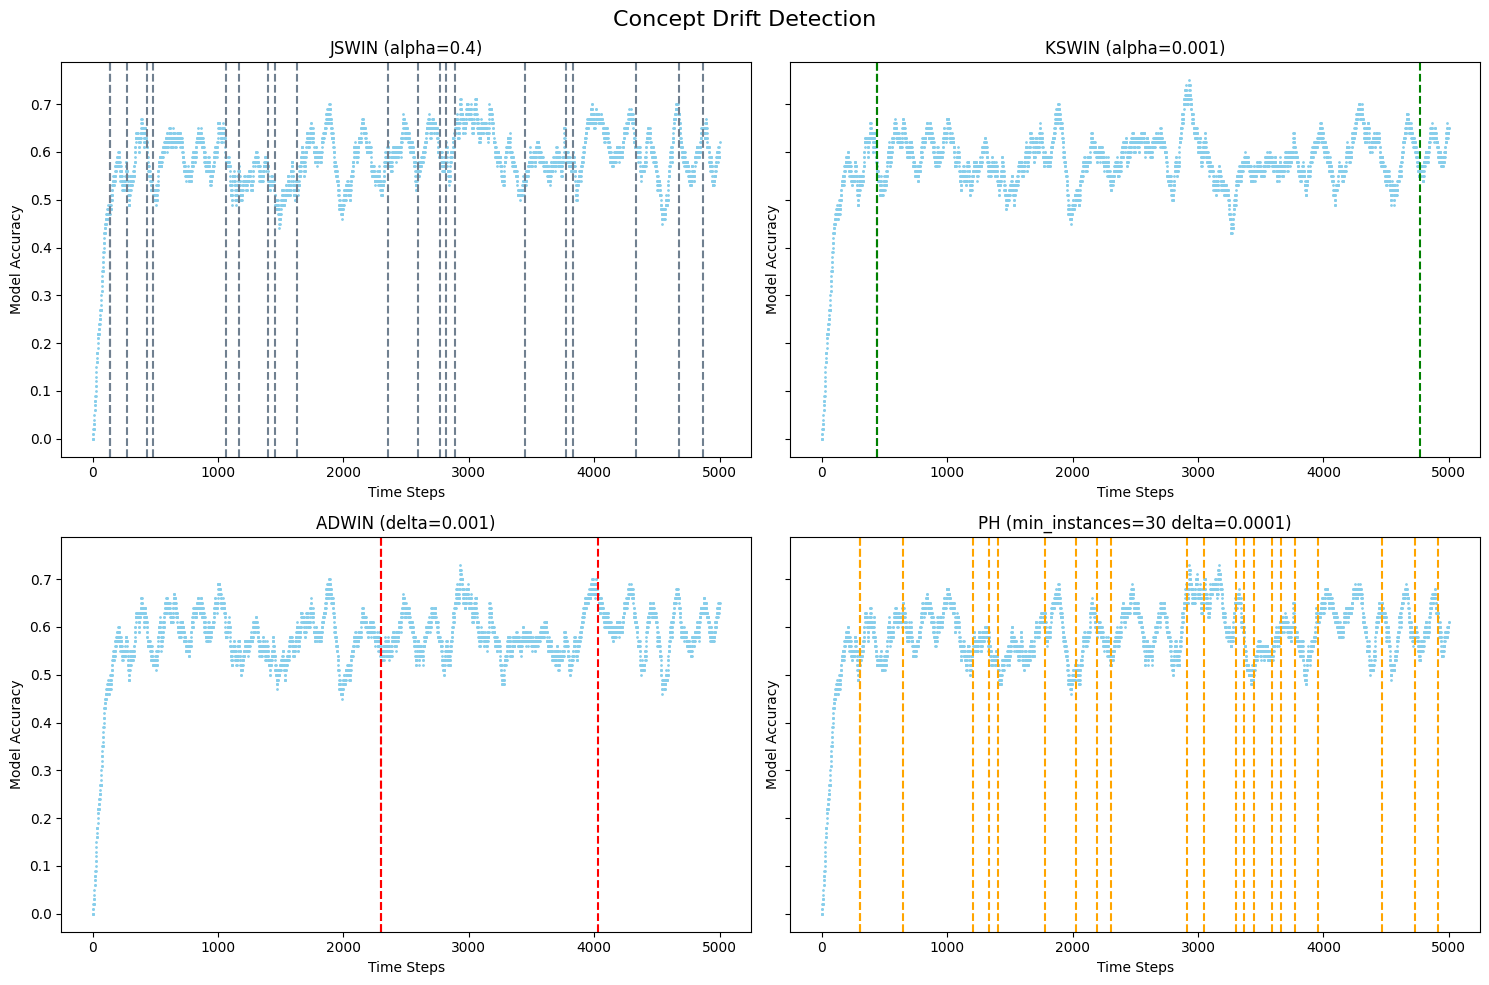

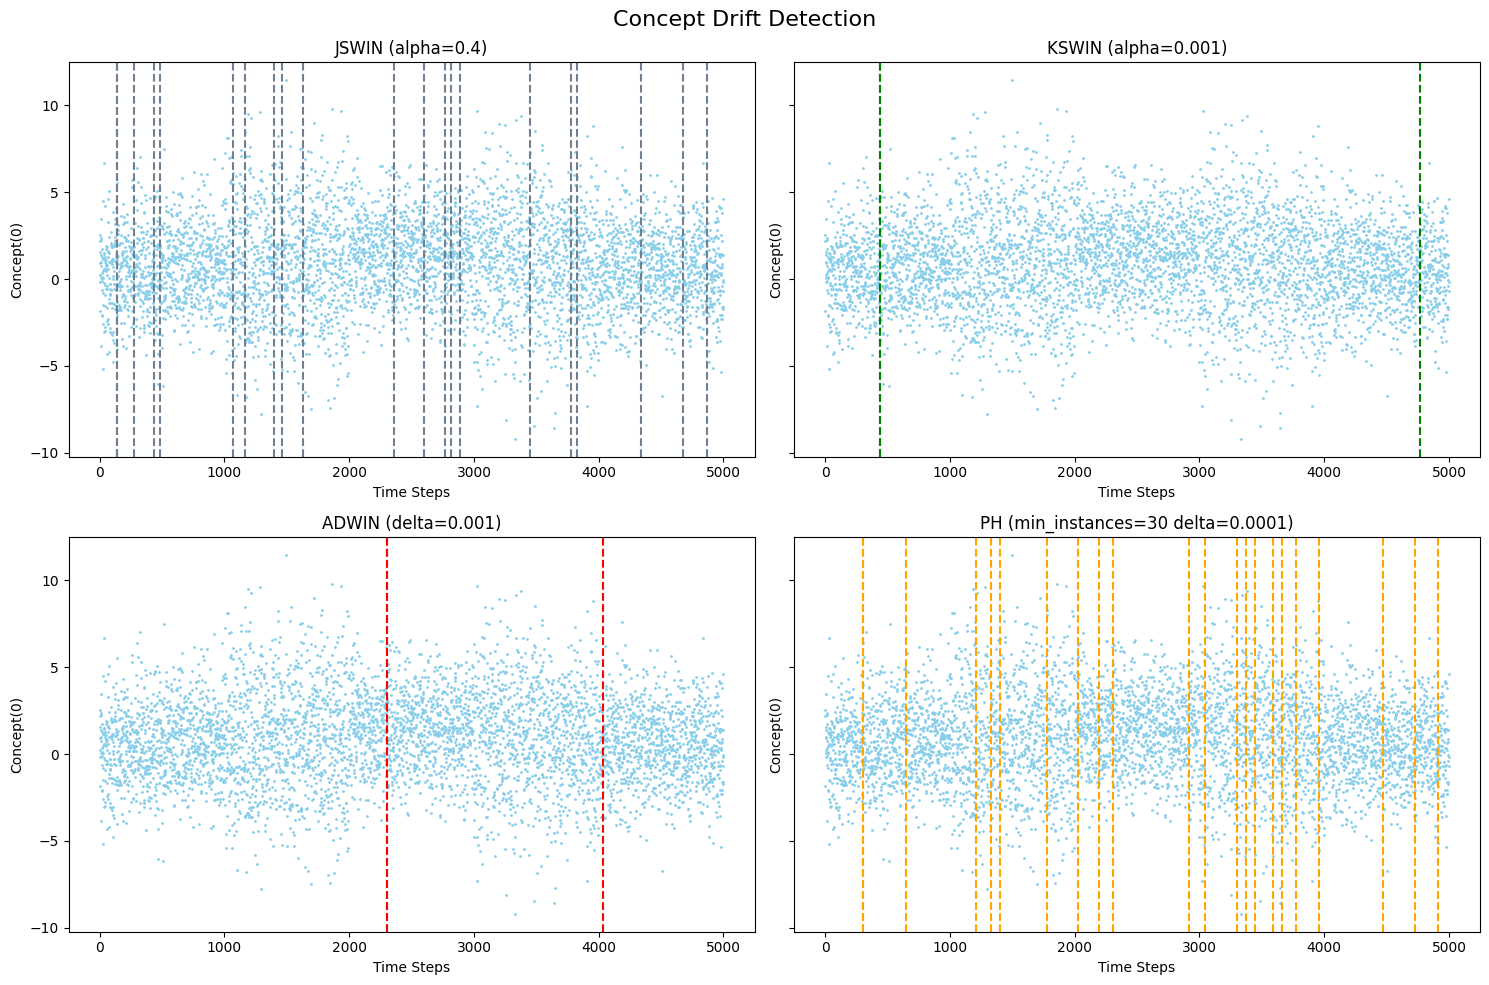

detector_name     ADWIN     JSWIN     KSWIN  No Detector        PH
drift_type                                                        
CONCEPT        0.577836  0.581180  0.577130          NaN  0.581650
ERROR          0.579092  0.581636  0.576608          NaN  0.582236
NO_DRIFT            NaN       NaN       NaN     0.579092       NaN

In [2]:
artifical_ds = SyntheticDataStream(
    distribution_types=[np.random.normal for i in range(5)],
    pos_distribution_params=[(0, 2), (0.5, 3), (1, 2), (0.5, 3), (0, 2)],
    neg_distribution_params=[(1, 2), (1.5, 3), (2, 2), (1.5, 3), (1, 2)],
    samples_lens=[1000 for _ in range(5)],
)
artifical_ds.plot_stream()

window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance, data_stream=artifical_ds, window_size=window_size, drift_col_id=0
)
exp.run()

exp.plot()
exp.get_average_accs()

#### Model - Hoeffding Adaptive Tree Classifier

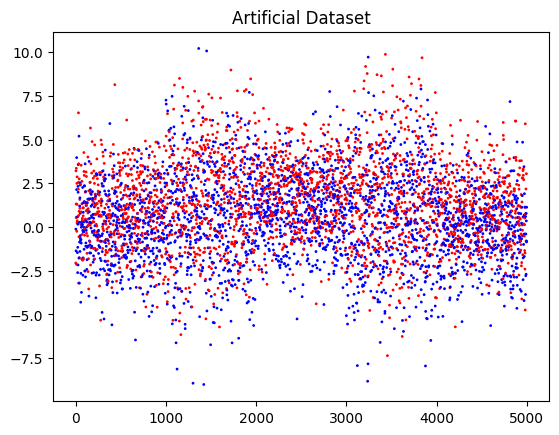

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.05
Processing detector JSWIN with params alpha=0.1
Processing detector JSWIN with params alpha=0.2
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector ADWIN with params delta=0.001
Processing detector ADWIN with params delta=0.002
Processing detector ADWIN with params delta=0.005
Processing detector ADWIN with params delta=0.01
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector KSWIN with params alpha=0.005
Processing detector KSWIN with params alpha=0.01
Processing detector KSWIN with params alpha=0.05
Processing detector PH with params min_instances=100 delta=0.005
Processing detector PH with params min_instances=30 d

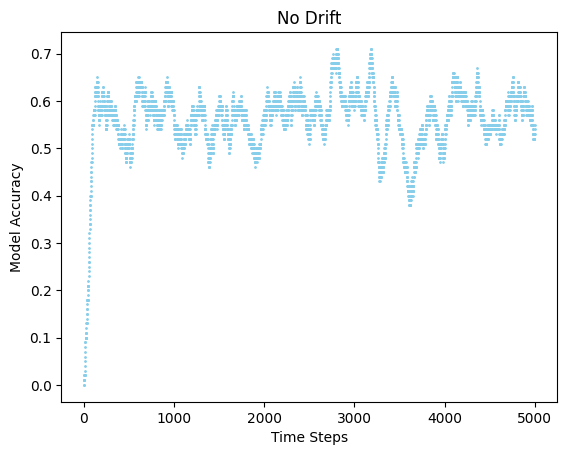

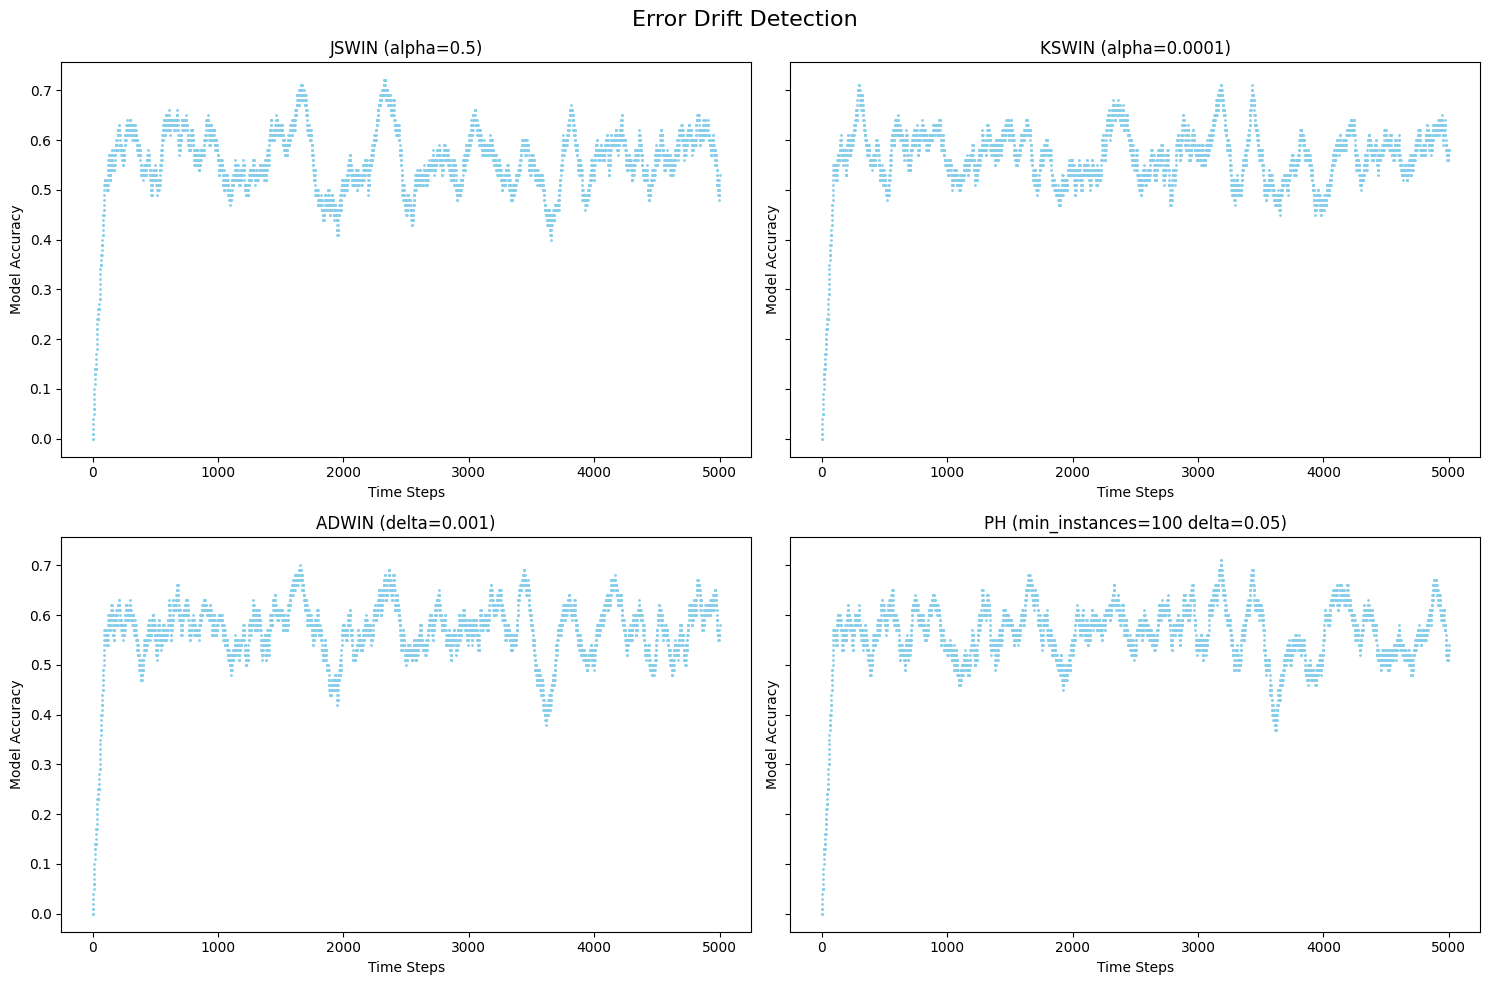

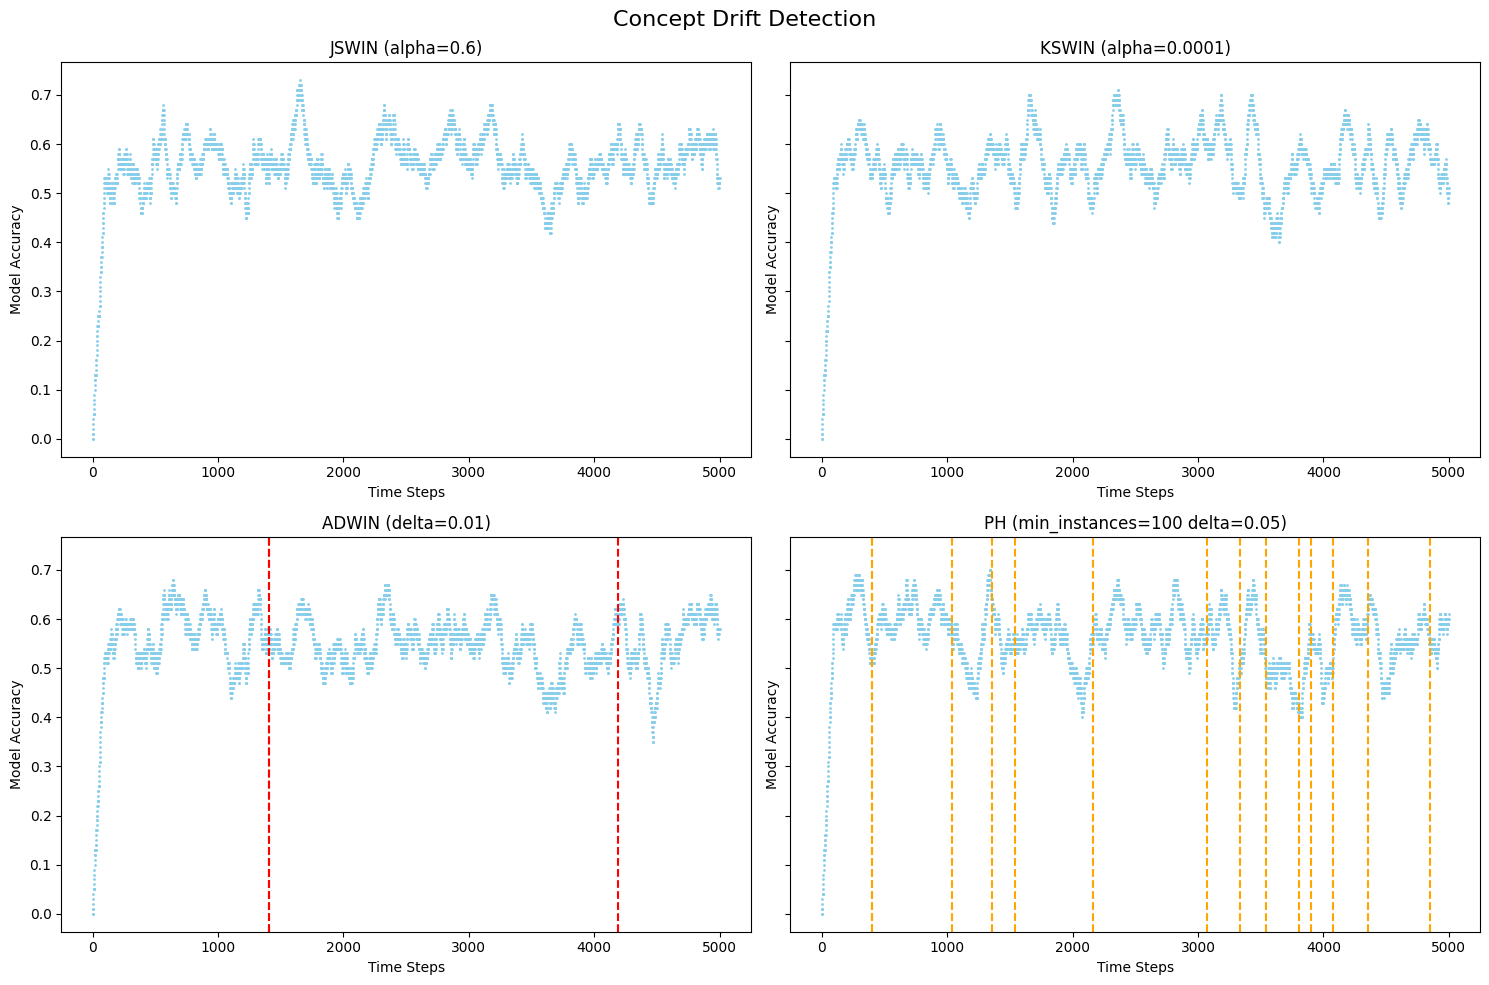

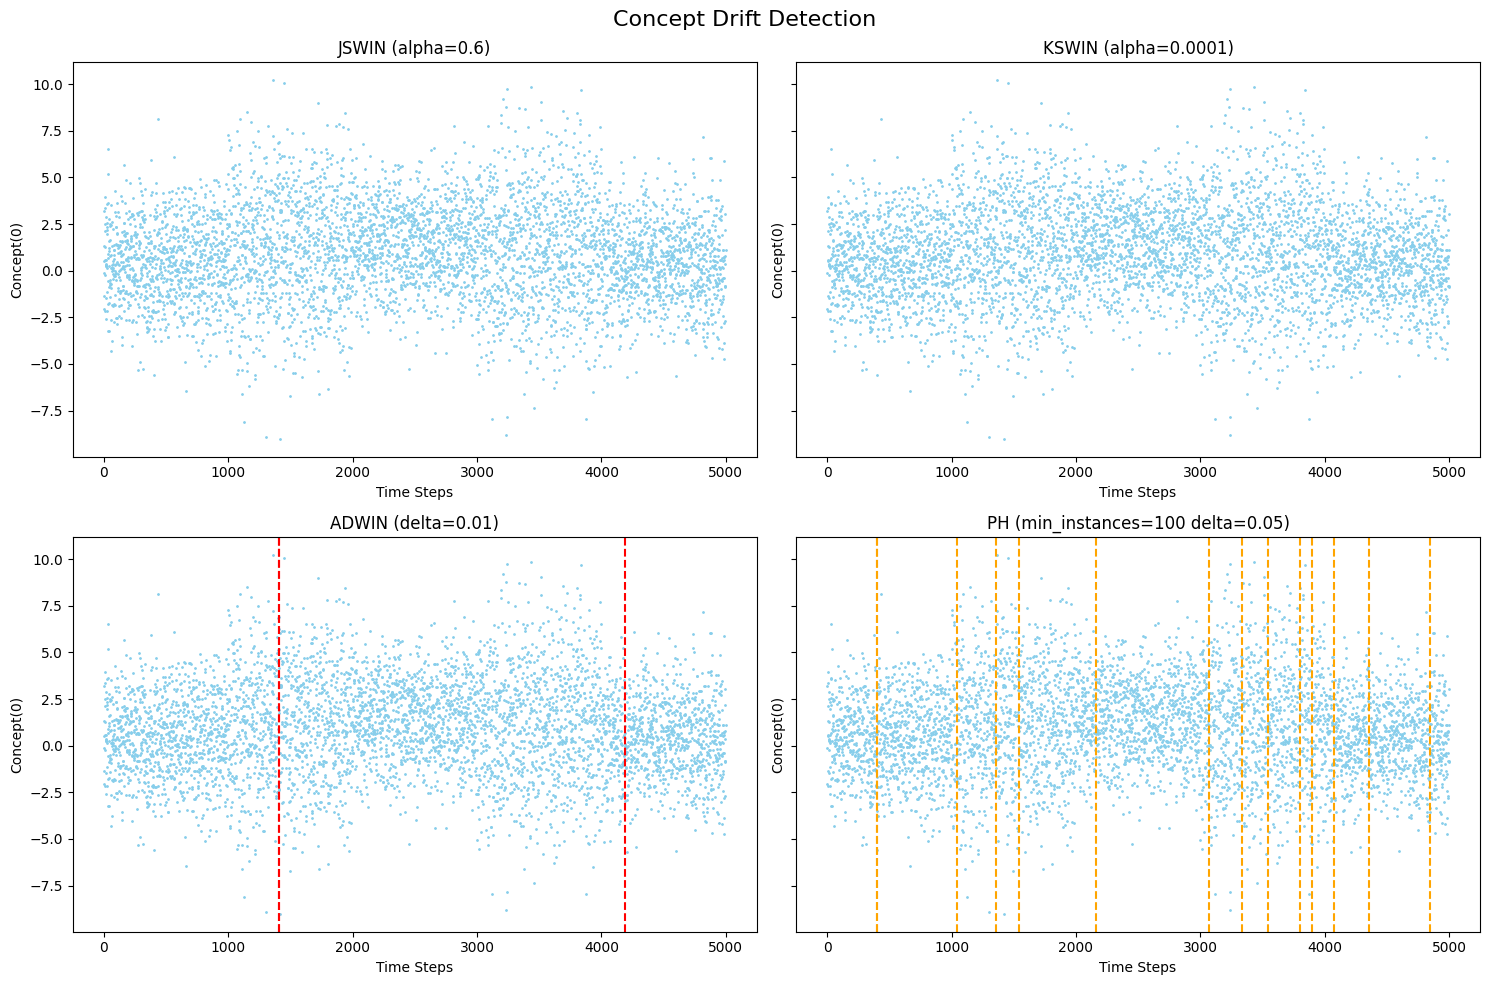

detector_name     ADWIN     JSWIN     KSWIN  No Detector        PH
drift_type                                                        
CONCEPT        0.547792  0.554646  0.555450          NaN  0.560644
ERROR          0.566572  0.557116  0.564596          NaN  0.560192
NO_DRIFT            NaN       NaN       NaN     0.561194       NaN

In [3]:
artifical_ds = SyntheticDataStream(
    distribution_types=[np.random.normal for i in range(5)],
    pos_distribution_params=[(0, 2), (0.5, 3), (1, 2), (0.5, 3), (0, 2)],
    neg_distribution_params=[(1, 2), (1.5, 3), (2, 2), (1.5, 3), (1, 2)],
    samples_lens=[1000 for _ in range(5)],
)
artifical_ds.plot_stream()

window_size = 100
model_instance = tree.HoeffdingAdaptiveTreeClassifier

exp = Experiment(
    model_instance=model_instance, data_stream=artifical_ds, window_size=window_size, drift_col_id=0
)
exp.run()

exp.plot()
exp.get_average_accs()

### Data with Label Shift 

#### Model - Naive Bayes

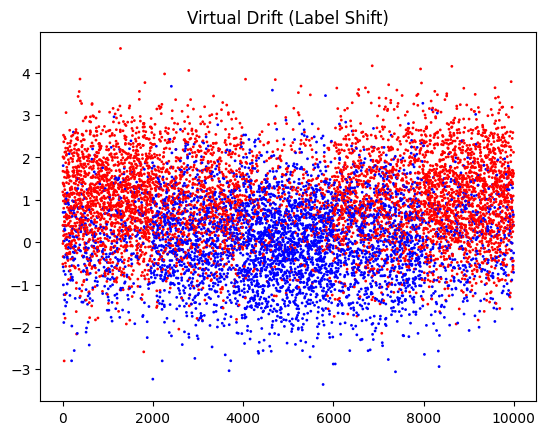

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.05
Processing detector JSWIN with params alpha=0.1
Processing detector JSWIN with params alpha=0.2
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector ADWIN with params delta=0.001
Processing detector ADWIN with params delta=0.002
Processing detector ADWIN with params delta=0.005
Processing detector ADWIN with params delta=0.01
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector KSWIN with params alpha=0.005
Processing detector KSWIN with params alpha=0.01
Processing detector KSWIN with params alpha=0.05
Processing detector PH with params min_instances=100 delta=0.005
Processing detector PH with params min_instances=30 d

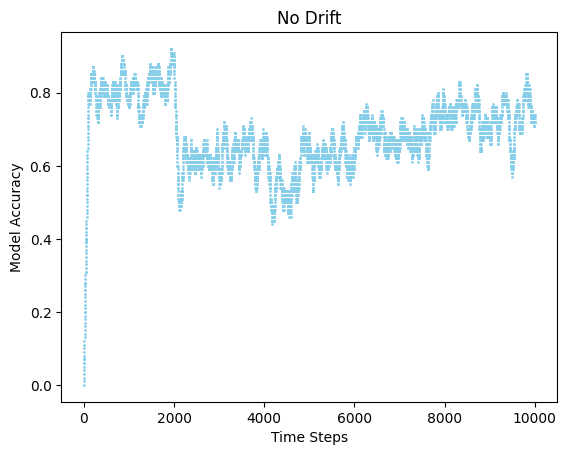

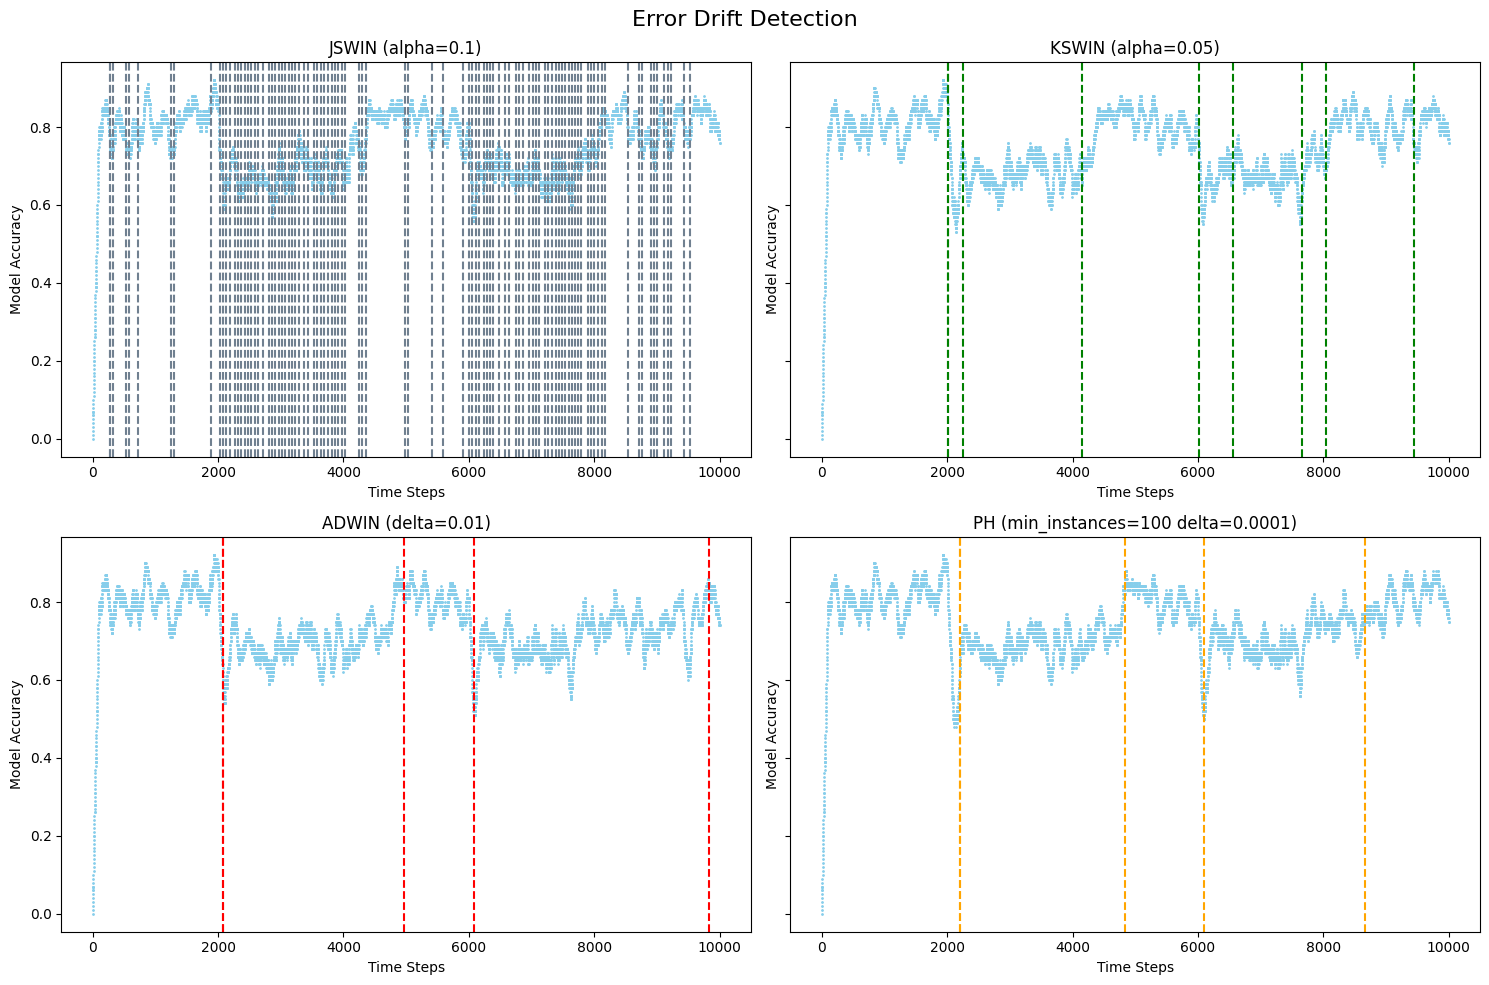

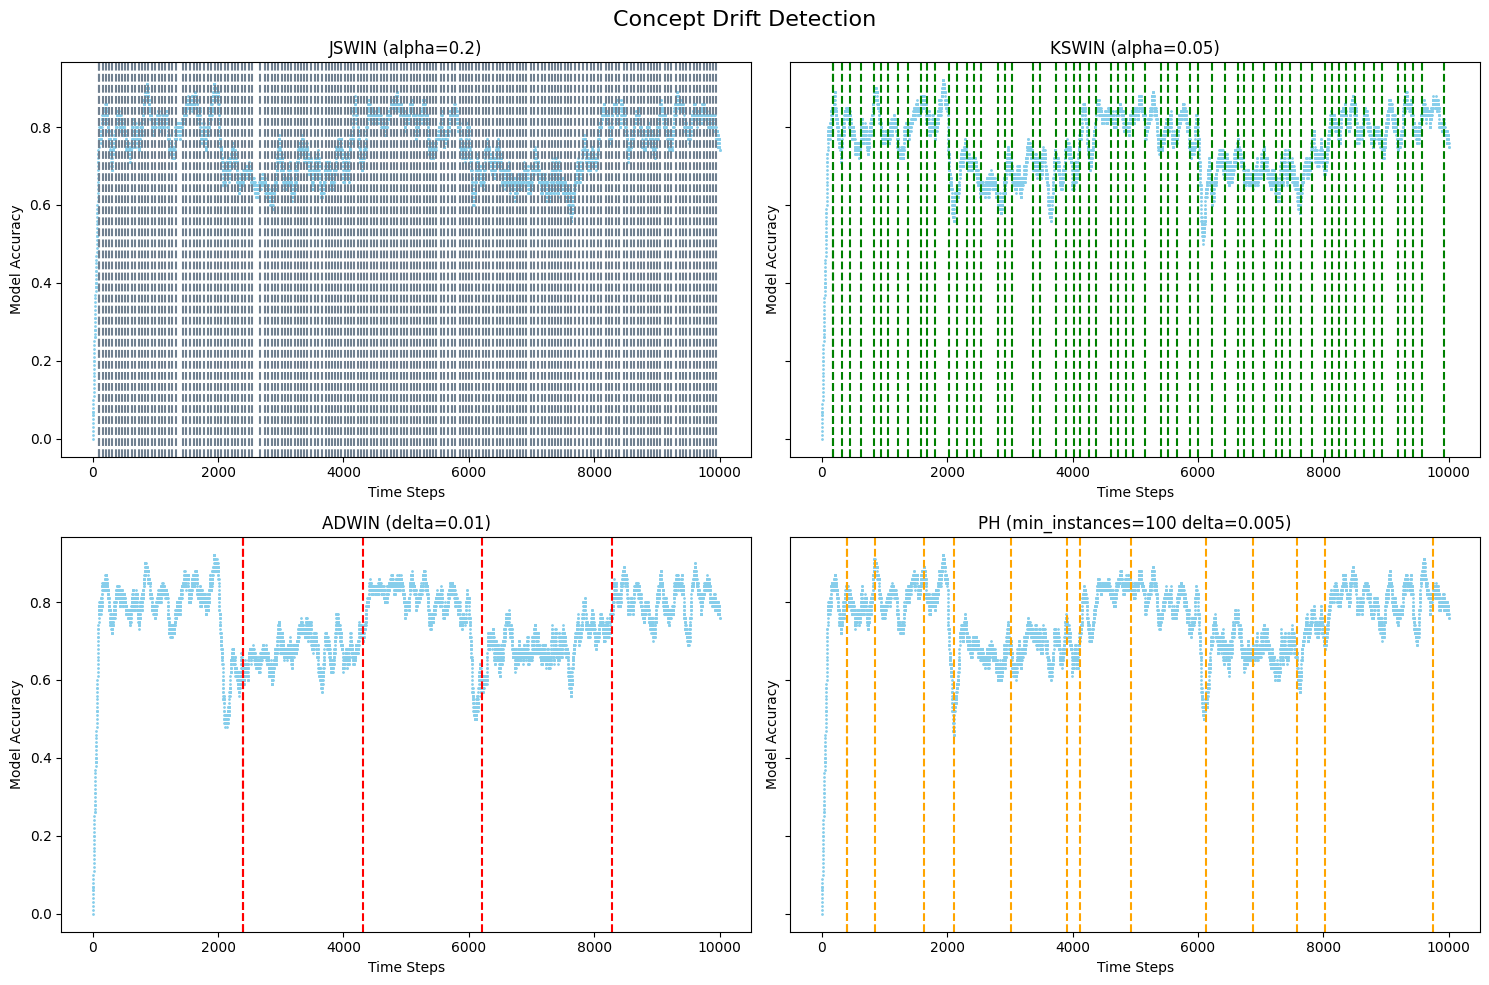

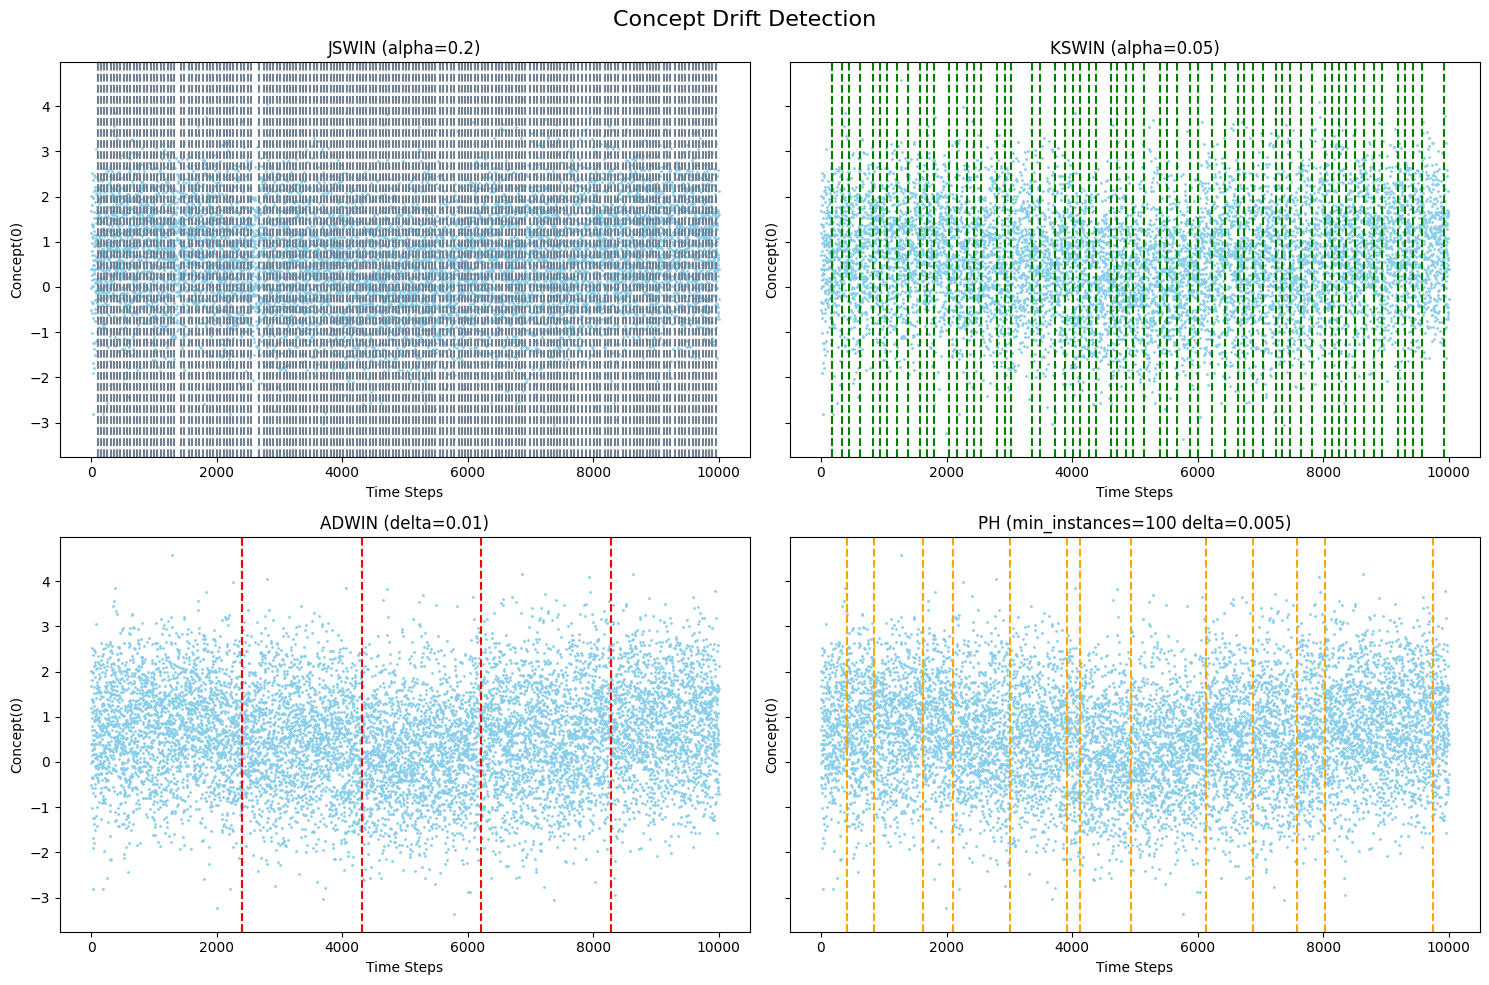

detector_name     ADWIN     JSWIN     KSWIN  No Detector        PH
drift_type                                                        
CONCEPT        0.743225  0.751147  0.751684          NaN  0.750725
ERROR          0.735656  0.751425  0.749741          NaN  0.742583
NO_DRIFT            NaN       NaN       NaN     0.687918       NaN

In [4]:
label_shift_ds = LabelShiftDataStream(n=10000, ratios=[0.2, 0.5, 0.8, 0.5, 0.2])
label_shift_ds.plot_stream()

window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance,
    data_stream=label_shift_ds,
    window_size=window_size,
    drift_col_id=0,
)
exp.run()

exp.plot()
exp.get_average_accs()

#### Model - Hoeffding Adaptive Tree Classifier

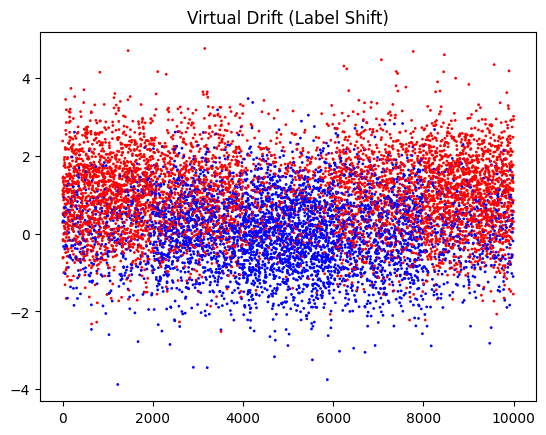

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector ADWIN with params delta=0.001
Processing detector ADWIN with params delta=0.002
Processing detector ADWIN with params delta=0.005
Processing detector ADWIN with params delta=0.01
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector KSWIN with params alpha=0.005
Processing detector KSWIN with params alpha=0.01
Processing detector KSWIN with params alpha=0.05
Processing detector PH with params min_instances=100 delta=0.005
Processing detector PH with params min_instances=30 delta=0.005
Processing detector PH with params min_instances=100 delta=0.05
Processing detector PH with params min_instances=30 delta=0.05
Process

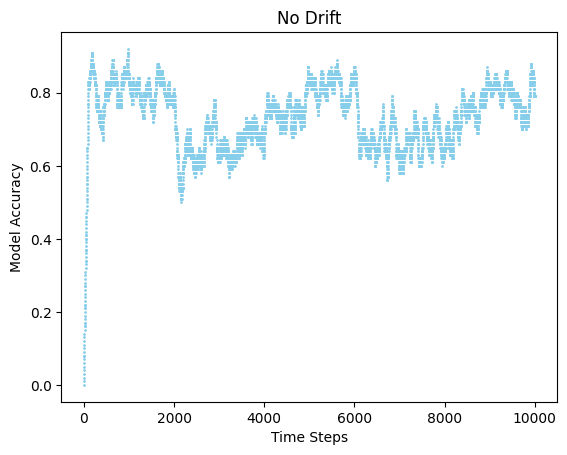

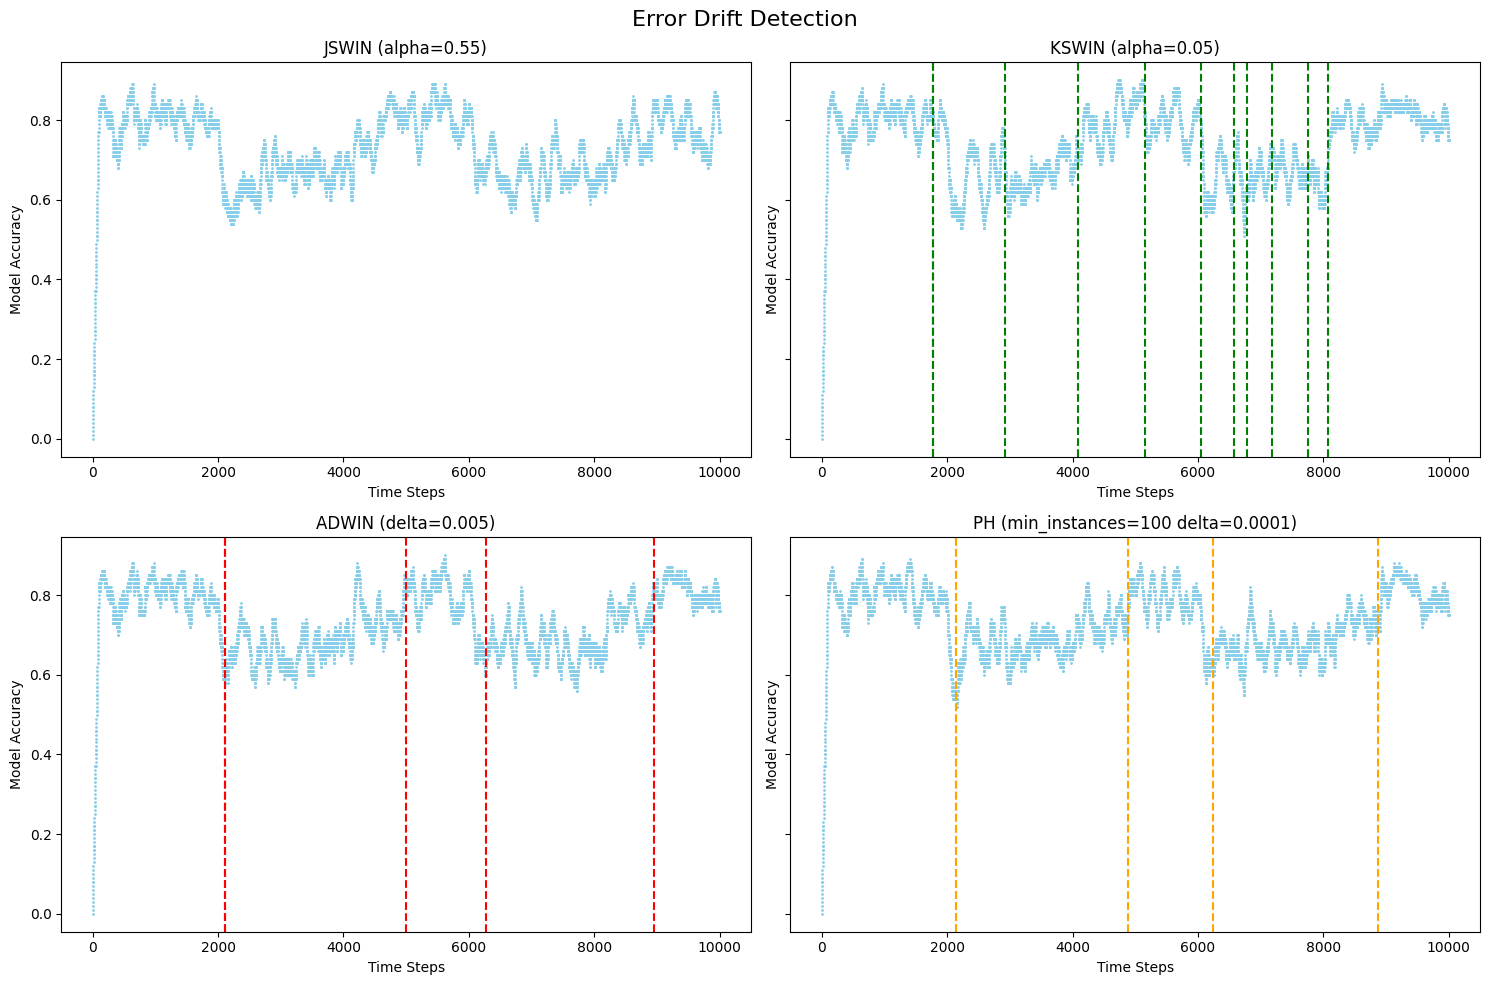

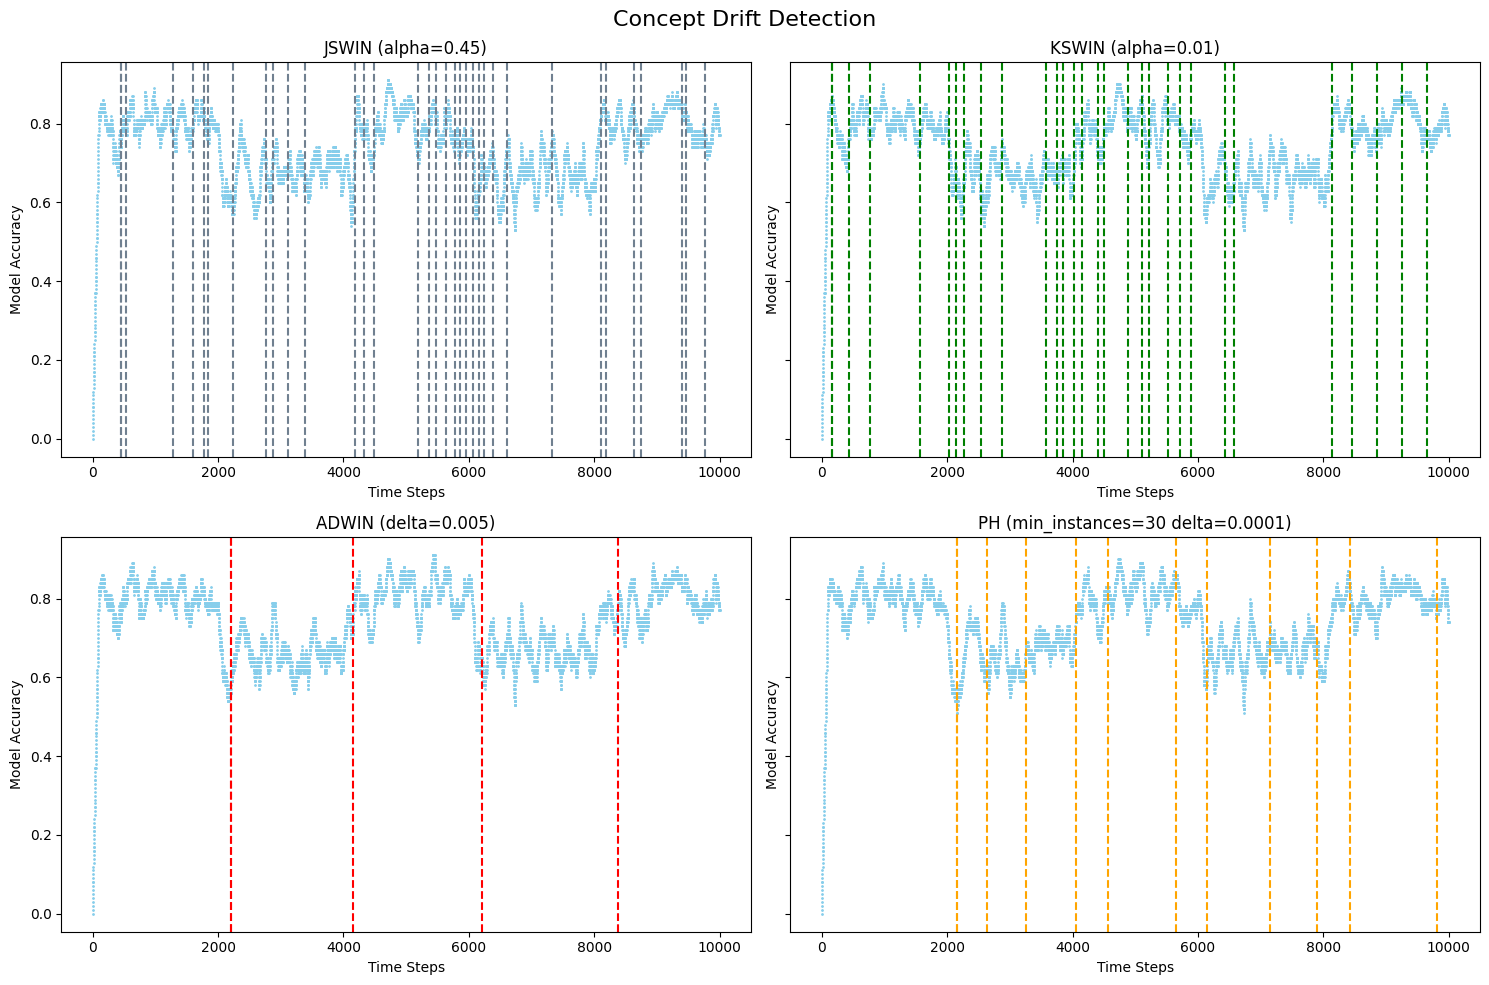

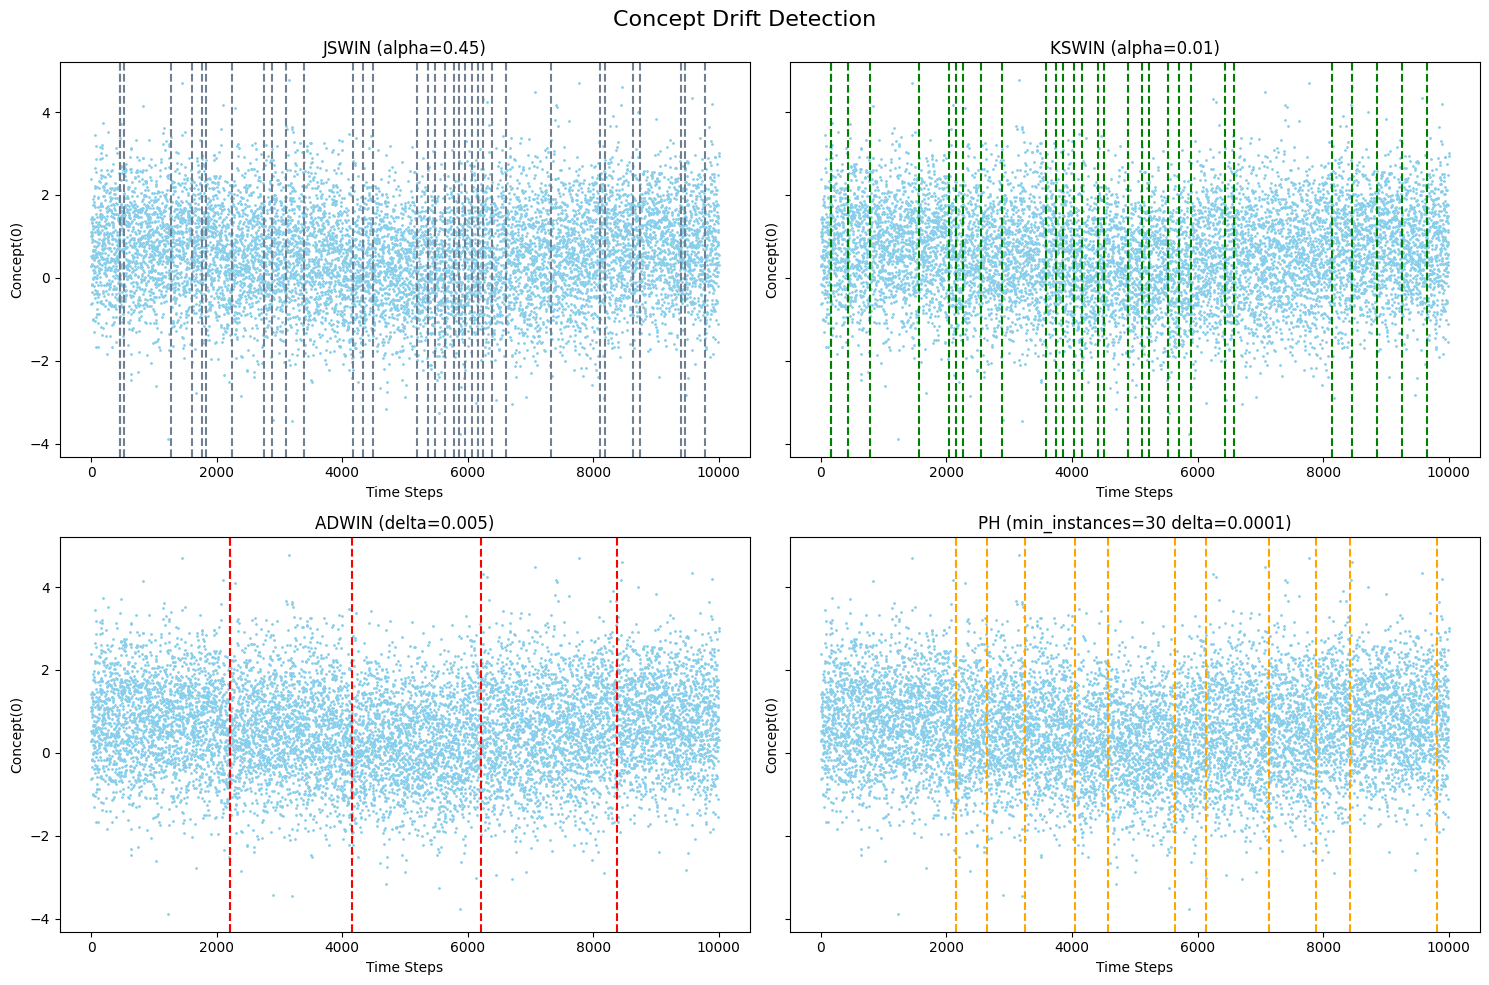

detector_name     ADWIN     JSWIN     KSWIN  No Detector        PH
drift_type                                                        
CONCEPT        0.740913  0.740237  0.739843          NaN  0.740276
ERROR          0.733673  0.730106  0.737962          NaN  0.731675
NO_DRIFT            NaN       NaN       NaN     0.732178       NaN

In [2]:
label_shift_ds = LabelShiftDataStream(n=10000, ratios=[0.2, 0.5, 0.8, 0.5, 0.2])
label_shift_ds.plot_stream()

window_size = 100
model_instance = tree.HoeffdingAdaptiveTreeClassifier

exp = Experiment(
    model_instance=model_instance,
    data_stream=label_shift_ds,
    window_size=window_size,
    drift_col_id=0,
)
exp.run()

exp.plot()
exp.get_average_accs()

### Hyperplane Data

#### Model - Naive Bayes

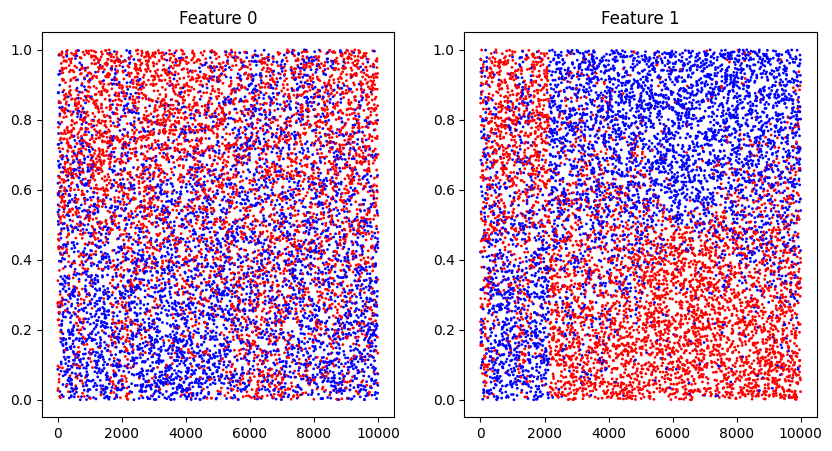

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.3
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector JSWIN with params alpha=0.65
Processing detector JSWIN with params alpha=0.7
Processing detector JSWIN with params alpha=0.8
Processing detector JSWIN with params alpha=0.9
Processing detector ADWIN with params delta=0.0001
Processing detector ADWIN with params delta=0.001
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector HDDM_A with params drift_confidence=1e-20
Processing detector HDDM_A with params drift_confidence=1e-15
Processing detector HDDM_W with params drift_confidence=1e-20
Processing detector HDDM_W with params drift_confidence=1e-15
Processing detector 

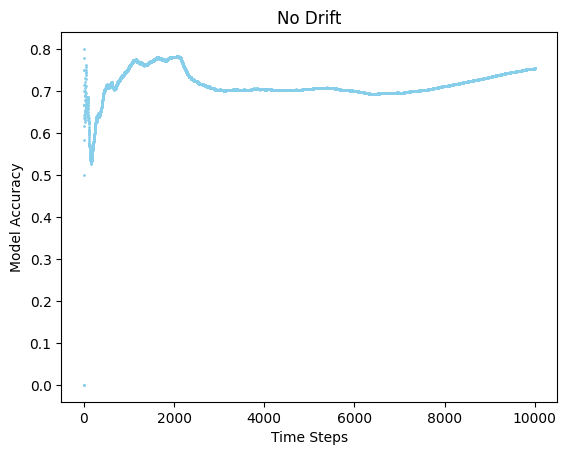

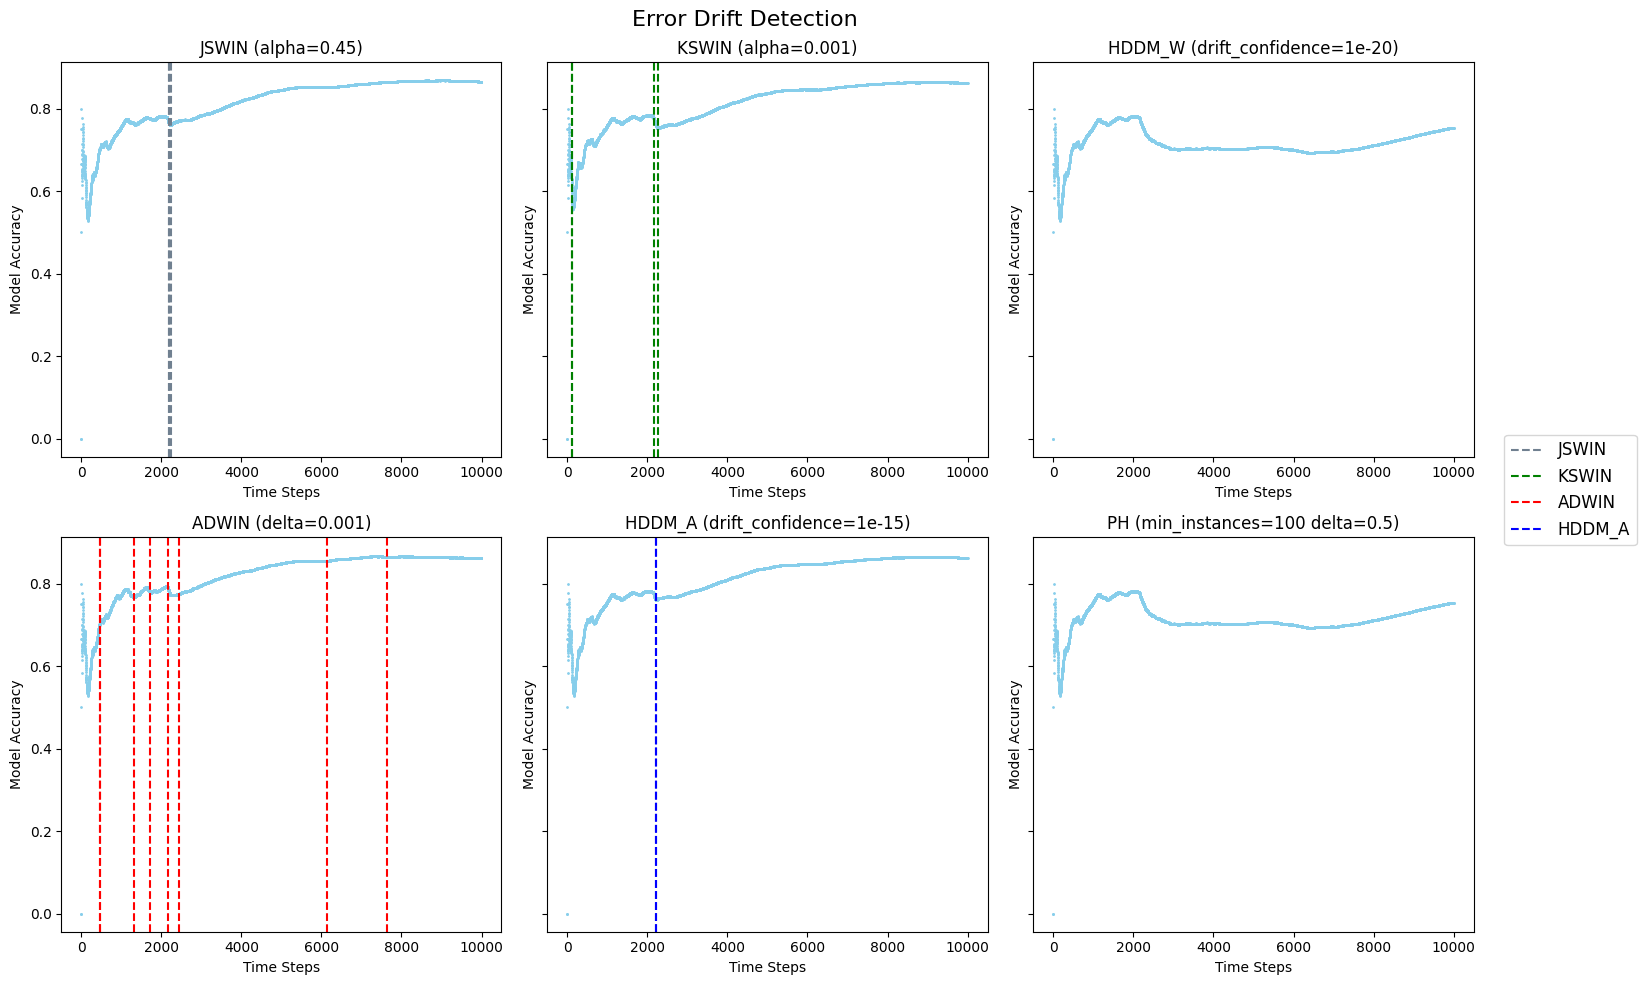

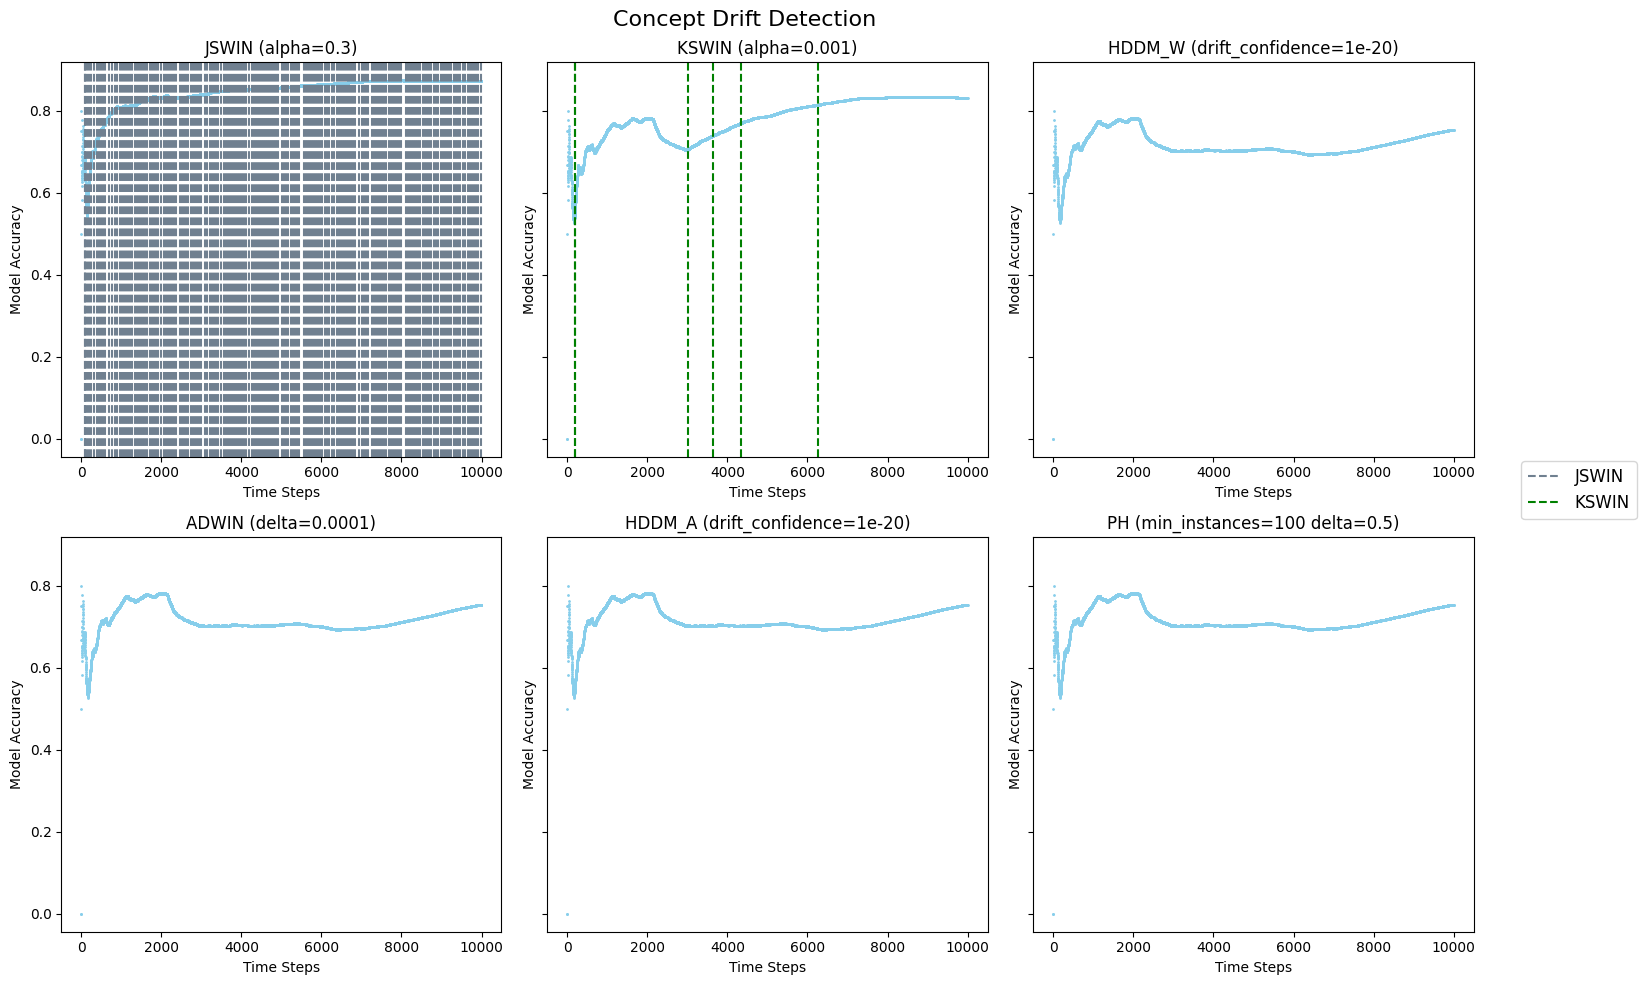

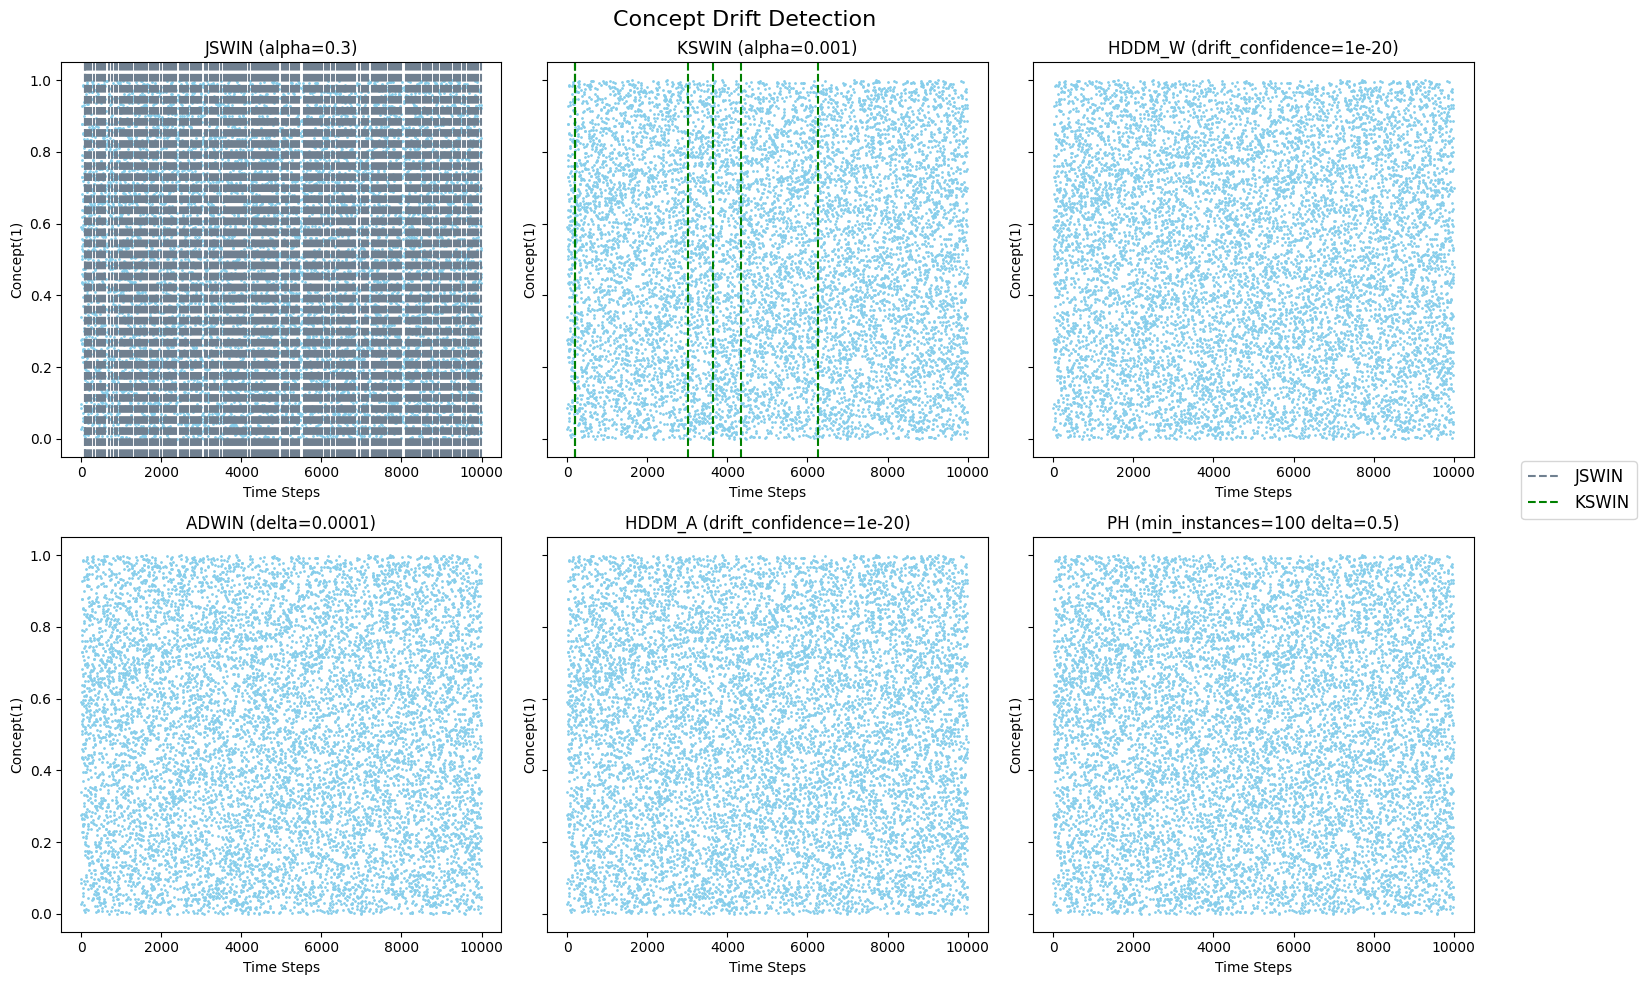

detector_name     ADWIN    HDDM_A    HDDM_W     JSWIN     KSWIN  No Detector  \
drift_type                                                                     
CONCEPT        0.715887  0.715887  0.715887  0.843642  0.780221          NaN   
ERROR          0.821146  0.812201  0.715887  0.816464  0.812373          NaN   
NO_DRIFT            NaN       NaN       NaN       NaN       NaN     0.715887   

detector_name        PH  
drift_type               
CONCEPT        0.715887  
ERROR          0.715887  
NO_DRIFT            NaN

In [ ]:
hyperplane_ds = HyperplaneStream(seed=42, n_drift_features=2, n_features=2, mag_change=0.3)
hyperplane_ds.plot_stream()

window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance,
    data_stream=hyperplane_ds,
    window_size=window_size,
    drift_col_id=1,
)
exp.run()

exp.plot()
exp.get_average_accs()

#### Model - Hyperplane

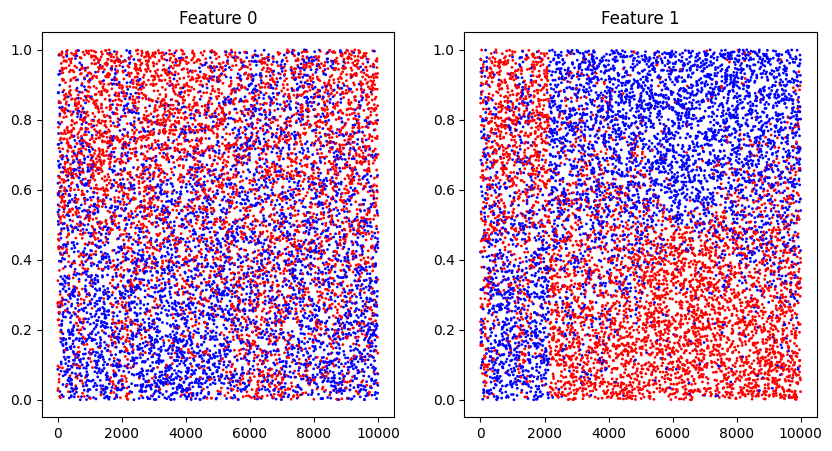

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.3
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector JSWIN with params alpha=0.65
Processing detector JSWIN with params alpha=0.7
Processing detector JSWIN with params alpha=0.8
Processing detector JSWIN with params alpha=0.9
Processing detector ADWIN with params delta=0.0001
Processing detector ADWIN with params delta=0.001
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector HDDM_A with params drift_confidence=1e-20
Processing detector HDDM_A with params drift_confidence=1e-15
Processing detector HDDM_W with params drift_confidence=1e-20
Processing detector HDDM_W with params drift_confidence=1e-15
Processing detector 

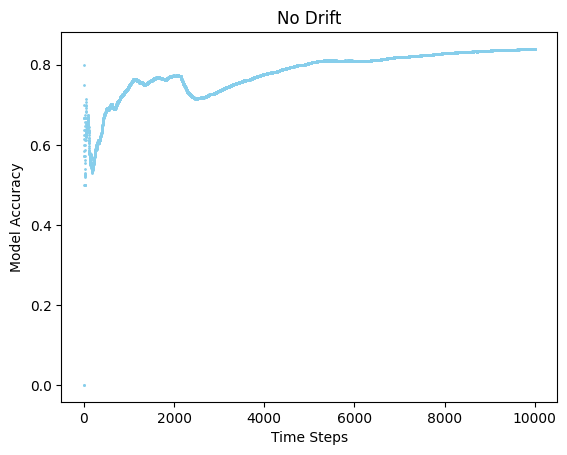

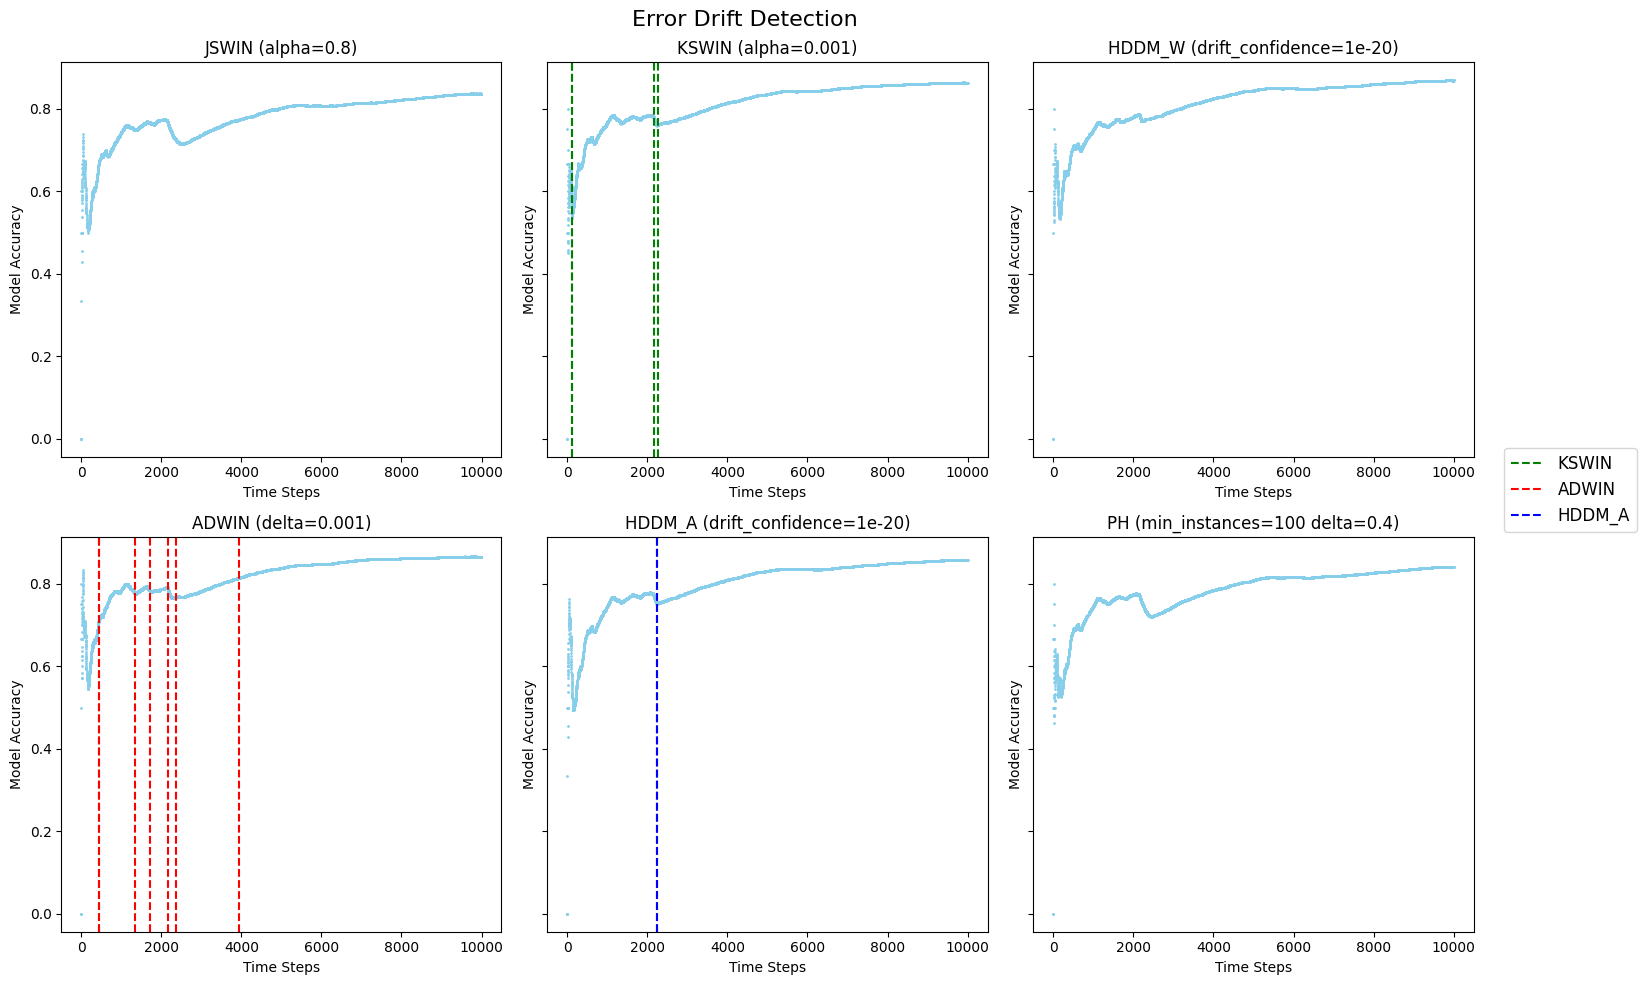

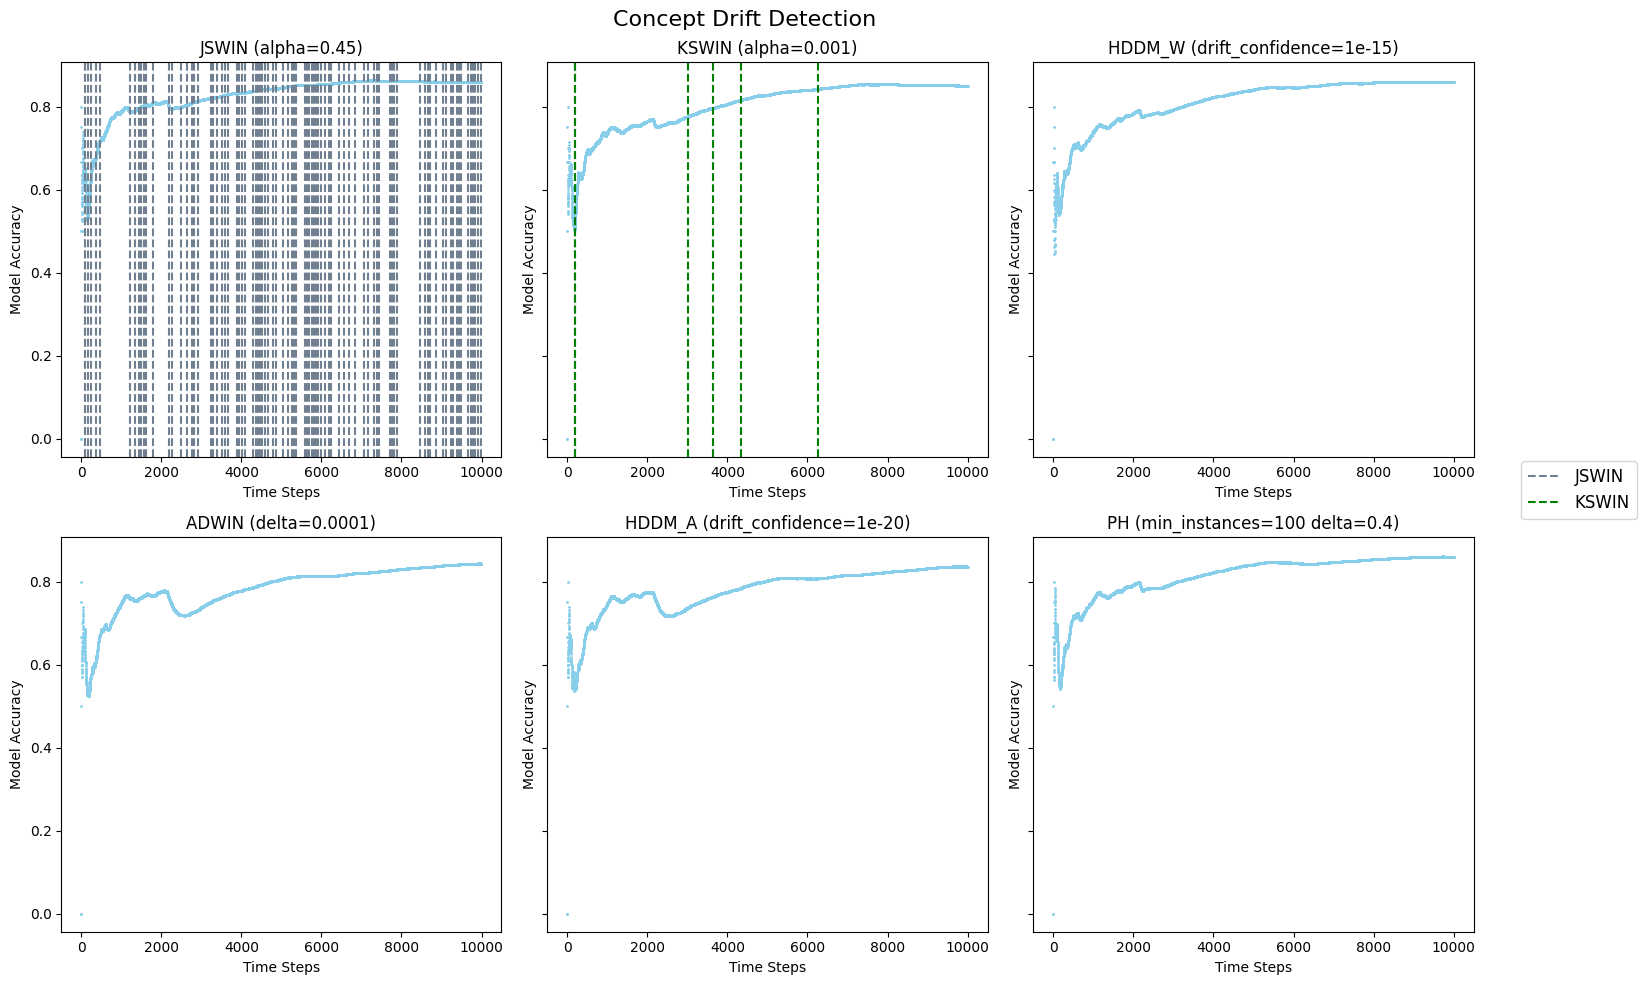

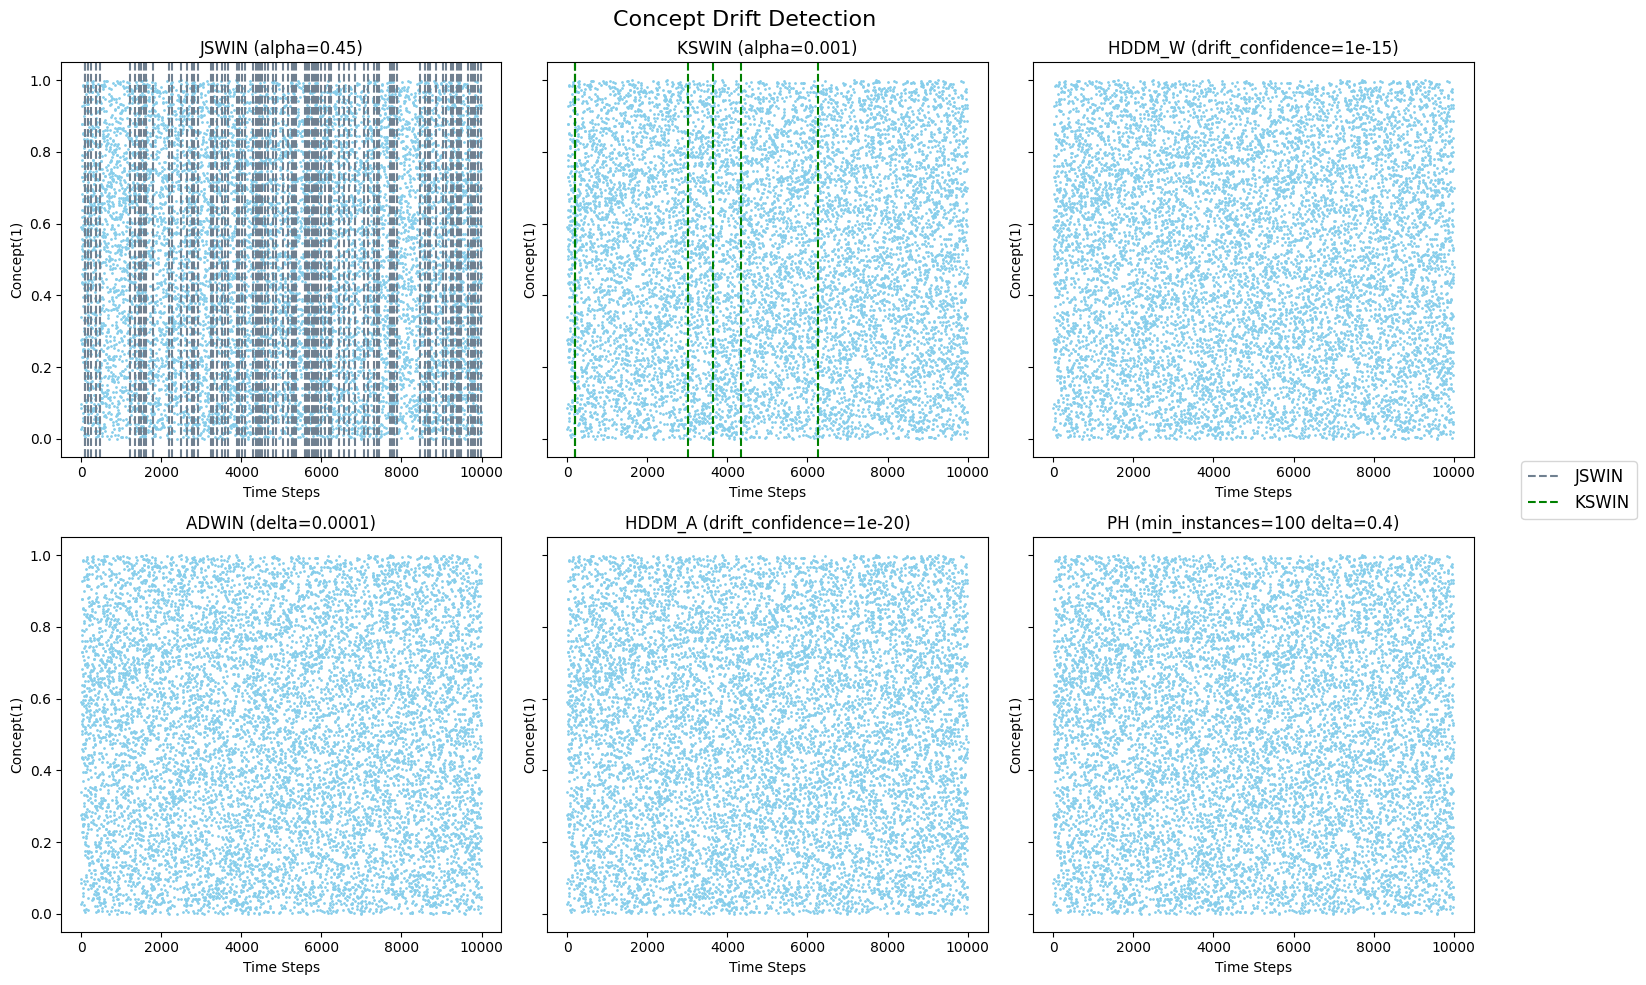

detector_name     ADWIN    HDDM_A    HDDM_W     JSWIN     KSWIN  No Detector  \
drift_type                                                                     
CONCEPT        0.784347  0.780865  0.812589  0.826667  0.803044          NaN   
ERROR          0.818479  0.802448  0.815427  0.779155  0.812283          NaN   
NO_DRIFT            NaN       NaN       NaN       NaN       NaN     0.782056   

detector_name        PH  
drift_type               
CONCEPT        0.814844  
ERROR          0.784132  
NO_DRIFT            NaN

In [ ]:
hyperplane_ds = HyperplaneStream(seed=42, n_drift_features=2, n_features=2, mag_change=0.3)
hyperplane_ds.plot_stream()

window_size = 100
model_instance = tree.HoeffdingAdaptiveTreeClassifier

exp = Experiment(
    model_instance=model_instance,
    data_stream=hyperplane_ds,
    window_size=window_size,
    drift_col_id=1,
)
exp.run()

exp.plot()
exp.get_average_accs()